Least Squares Sigmoid Problem:
\begin{equation}
\begin{array}{cl}
\displaystyle\min_{x\in \mathbb{R}^n} & \tfrac{1}{m} \displaystyle\sum_{i=1}^m \left(y_i-\frac{1}{1+\exp \left(-x^{\top} a_i\right)}\right)^2
\end{array}
\end{equation}

In [1]:
# Load required packages
required_packages = ["DataFrames","LinearAlgebra","Statistics", "MAT","Random", "Plots","Zygote", "Measures", "PyPlot","CSV","Arpack","Downloads","SparseArrays","LIBSVM","LIBSVMdata"]
for pkg in required_packages
    try
        eval(Meta.parse("using $pkg"))
    catch e
        @warn "$pkg not found, installing..."
        import Pkg
        Pkg.add(pkg)
        eval(Meta.parse("using $pkg"))
    end
end

┌ Warning: MAT not found, installing...
└ @ Main In[1]:7
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed MPICH_jll ───────── v4.3.1+0
   Installed MicrosoftMPI_jll ── v10.1.4+3
   Installed MPIPreferences ──── v0.1.11
   Installed OpenMPI_jll ─────── v5.0.8+0
   Installed Hwloc_jll ───────── v2.12.1+0
   Installed HDF5_jll ────────── v1.14.6+0
   Installed BufferedStreams ─── v1.2.2
   Installed MAT ─────────────── v0.10.7
   Installed libaec_jll ──────── v1.1.3+0
   Installed MPItrampoline_jll ─ v5.5.4+0
   Installed HDF5 ────────────── v0.17.2
    Updating `~/.julia/environments/v1.11/Project.toml`
  [23992714] + MAT v0.10.7
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [e1450e63] + BufferedStreams v1.2.2
  [f67ccb44] + HDF5 v0.17.2
  [23992714] + MAT v0.10.7
  [3da0fdf6] + MPIPreferences v0.1.11
  [0234f1f7] + HDF5_jll v1.14.6+0
  [e33a78d0] + Hwloc_jll v2.12.1+0
  [7cb0a576] + MPICH_jll v4.3.1+0
  [f1f71cc9] + M

In [2]:
#______________________________________________________________________________#
#             After switching to "Julia" kernel, run this cell                 #
#______________________________________________________________________________#
using DataFrames
using LinearAlgebra
using Statistics
using MAT
using Random
using Plots
using Zygote
using Measures
using PyPlot
using CSV
using Arpack
using Downloads
using SparseArrays
using LIBSVM
#______________________________________________________________________________#

#_________________________________setting problem______________________________#
#                --- Lasso Problem Data: Nonconvex_Regression_Radom ---                   #
#______________________________________________________________________________#
# Set random seed for reproducibility
Random.seed!(23)
# Function to parse LIBSVM format from a file
using LIBSVMdata
 A, y = load_dataset("a1a",
     dense   = false,
     replace = false,
     verbose = true,
 )
 m = size(A, 1)
n = size(A, 2)
# Define sigmoid function
sigmoid(z) = 1 / (1 + exp(-z))

# Define squared error loss function
function f(x)
    predictions = sigmoid.(A * x)  # Compute sigmoid of x^T a_i for each row
    errors = y .- predictions      # Compute differences from labels
    return mean(errors .^ 2)       # Return mean squared error
end
# Gradient via automatic differentiation
grad_f(x) = Zygote.gradient(f, x)[1]

# Lipschitz constant estimation
L = opnorm(Array(A))^2 / (2 * m)
println("Lipschitz constant (L): $L")


rho = 1
# Linear Minimization Oracle (LMO) unit l2 ball
function lmo(g; tau=1.0)
    norm_g = norm(g, 2)
    return norm_g > 0 ? -tau * g / norm_g : zeros(length(g))
end
#
x0 = randn(n)
max_iter = 3000
#______________________________________________________________________________#

* Couldn't find host www.csie.ntu.edu.tw in the .netrc file; using defaults
* Host www.csie.ntu.edu.tw:443 was resolved.
* IPv6: (none)
* IPv4: 140.112.30.26
*   Trying 140.112.30.26:443...
* Connected to www.csie.ntu.edu.tw (140.112.30.26) port 443
* mbedTLS: Connecting to www.csie.ntu.edu.tw:443
* mbedTLS: Set min SSL version to TLS 1.0
* ALPN: curl offers h2,http/1.1
* mbedTLS: Handshake complete, cipher is TLS-ECDHE-RSA-WITH-AES-128-GCM-SHA256
* Dumping cert info: * cert. version     : 3
* serial number     : 47:E8:00:00:00:07:87:FE:49:35:DC:01:F3:CD:23:5B
* issuer name       : C=TW, O=TAIWAN-CA, CN=TWCA Secure SSL Certification Authority
* subject name      : C=TW, ST=Taiwan, L=Taipei, O=National Taiwan University, CN=*.csie.ntu.edu.tw
* issued  on        : 2024-10-16 09:35:59
* expires on        : 2025-11-03 15:59:59
* signed using      : RSA with SHA-256
* RSA key size      : 2048 bits
* basic constraints : CA=false
* subject alt name  :
*     dNSName : *.csie.ntu.edu.tw
*     d

Loading the dataset...


* Connection cache is full, closing the oldest one
* Connection #4 to host www.csie.ntu.edu.tw left intact
0.0%┣                                             ┫ 0/1.6k [00:00<00:00, -0s/it]


Lipschitz constant (L): 3.1343150360906673


0.1%┣                                         ┫ 1/1.6k [00:00<Inf:Inf, InfGs/it]
100.0%┣██████████████████████████████████████┫ 1.6k/1.6k [00:00<00:00, 3.6kit/s]
100.0%┣██████████████████████████████████████┫ 1.6k/1.6k [00:00<00:00, 3.6kit/s]


3000

In [3]:
# Ensure all necessary packages are loaded   Norm 2
using DataFrames
using LinearAlgebra
using Statistics
using MAT
using Random
using Plots
using Zygote
using Measures
using PyPlot
using CSV
using Arpack
using Downloads
using SparseArrays
using LIBSVM
#______________________________________________________________________________#
#__________________________________Main Functions______________________________#
#______________________________________________________________________________#

#___________ __FW: Adaptive step-size with constant scalling___________________#
function conditional_gradient_adaptive(f, grad_f, lmo, x0, rho, max_iter, gamma; epsilon=1e-5, delta=1e-10, beta=2)
    println("\e[34m________Adaptive step-size: with constant scaling_________")
    x_prev = copy(x0)
    x_curr = copy(x0)
    values = [f(x_curr)]
    times = [0.0]
    gaps = Float64[]
    L_ks = Float64[]
    steps = Float64[]
    backtrack_counts = Int[]
    k = 0
    prev_grad = grad_f(x_prev)
    current_f = f(x_curr)
    prev_t_k = 0.0  # Initialize previous step size for k=0
    while k < max_iter
        start = time()
        current_grad = grad_f(x_curr)
        v = lmo(current_grad)
        grad_norm = norm(current_grad)
        if grad_norm <= epsilon
            println(">>>       Terminated at k=$k, Dual Gap: $(round(grad_norm, digits=4))")
            iteration_time = time() - start #  record final time
            push!(times, iteration_time)      #  save final time
            push!(gaps, grad_norm)
            break
        end
        if k == 0
            Random.seed!(23)
            d0 = randn(length(x0))
            L_k = gamma * ((norm(grad_f(x0) - grad_f(x0 + 1e-3 * d0)) / (1e-3 * norm(d0))) + delta)
        else
            grad_diff = norm(current_grad - prev_grad)
            L_k = gamma * (grad_diff / (rho * prev_t_k) + delta)  # Updated L_k using previous t_{k-1}
        end
        t_k = grad_norm / (rho * L_k)
        i = 0
        while true
            x_new = x_curr + t_k * v
            new_f = f(x_new)
            if current_f - new_f >= rho * t_k * grad_norm - (L_k / 2) * t_k^2 * rho^2
                x_prev = copy(x_curr)
                x_curr = x_new
                push!(backtrack_counts, i)
                break
            else
                L_k *= beta
                t_k = grad_norm / (rho * L_k)
                i += 1
            end
        end
        iteration_time = time() - start
        k += 1
        current_f = f(x_curr)
        prev_grad = current_grad
        prev_t_k = t_k  # Store current t_k for use in next iteration
        push!(gaps, grad_norm)
        push!(steps, t_k)
        push!(values, current_f)
        push!(times, iteration_time)
        push!(L_ks, L_k)
        if k % 100 == 0   # Print progress only every 100 iterations
            println("k $k: Dual Gap = $(round(grad_norm, digits=4)), t_k = $(round(t_k, digits=6)), L_k = $(round(L_k, digits=6)), Time = $(round(iteration_time, digits=4)) sec, f_k = $(round(current_f, digits=6))")
        end
    end
    println("k $k: Dual Gap = $(round(gaps[end], digits=4)), t_k = $(round(steps[end], digits=6)), L_k = $(round(L_ks[end], digits=6)), Time = $(round(times[end], digits=4)) sec, f_k = $(round(values[end], digits=6))")
    total_time = sum(times)
    println("Adaptive Method (γ=$gamma):")
    println("Total time: $(round(total_time, digits=4)) seconds")
    println("Total backtracking steps: $(sum(backtrack_counts))")
    println("Total iterations: $k")
    println("Objective value: $(round(current_f, digits=6))")
    println("Max L_k: $(round(maximum(L_ks), digits=6))")
    println("Mean L_k: $(round(mean(L_ks), digits=6))")
    println("____________________________________________________________\e[0m")
    return (x_curr, values, times, gaps, L_ks, backtrack_counts, steps)
end
#______________________________________________________________________________#
#____________FW: Adaptive step-size with adjustable scalling___________________#
function conditional_gradient_adjustable_scaling(f, grad_f, lmo, x0, rho, max_iter, gamma; epsilon=1e-5, delta=1e-10, beta=2)
    println("\e[33m_____________________Adaptive step-size with adjustable scalling_____________________")
    x_prev = copy(x0)
    x_curr = copy(x0)
    values = [f(x_curr)]
    times = [0.0]
    gaps = Float64[]
    L_ks = Float64[]
    steps = Float64[]
    backtrack_counts = Int[]
    gamma_history = [gamma]  # Track gamma over iterations
    k = 0
    prev_grad = grad_f(x_prev)
    current_f = f(x_curr)
    recent_backtracks = Int[]  # Store backtracking counts for the last 10 iterations
    prev_t_k = 0.0  # Initialize previous step size for k=0

    while k < max_iter
        start = time()
        current_grad = grad_f(x_curr)
        v = lmo(current_grad)
        grad_norm = norm(current_grad)
        if grad_norm <= epsilon
            println(">>>       Terminated at k=$k, Dual Gap: $(round(grad_norm, digits=4))")
            iteration_time = time() - start #  record final time
            push!(times, iteration_time)      #  save final time
            push!(gaps, grad_norm)
            break
        end
        if k == 0
            Random.seed!(23)
            d0 = randn(length(x0))
            L_k = gamma * ((norm(grad_f(x0) - grad_f(x0 + 1e-3 * d0)) / (1e-3 * norm(d0))) + delta)
        else
            grad_diff = norm(current_grad - prev_grad)
            L_k = gamma * (grad_diff / (rho * prev_t_k) + delta)  # Updated L_k using previous t_{k-1}
        end
        t_k = grad_norm / (rho * L_k)
        i = 0
        while true
            x_new = x_curr + t_k * v
            new_f = f(x_new)
            if current_f - new_f >= rho * t_k * grad_norm - (L_k / 2) * t_k^2 * rho^2
                x_prev = copy(x_curr)
                x_curr = x_new
                push!(backtrack_counts, i)
                push!(recent_backtracks, i)
                break
            else
                L_k *= beta
                t_k = grad_norm / (rho * L_k)
                i += 1
            end
        end
        iteration_time = time() - start
        k += 1
        current_f = f(x_curr)
        prev_grad = current_grad
        prev_t_k = t_k  # Store current t_k for use in next iteration
        push!(gaps, grad_norm)
        push!(steps, t_k)
        push!(values, current_f)
        push!(times, iteration_time)
        push!(L_ks, L_k)

        # Adaptive gamma adjustment every 10 iterations
        if k % 10 == 0 && k > 0
            total_backtracks = sum(recent_backtracks)
            if total_backtracks == 0
                gamma = gamma * 0.9  # Decrease gamma, with a lower bound
            elseif total_backtracks > 10
                gamma = min(1, gamma * 1.1)  # Increase gamma, with an upper bound
            end
            push!(gamma_history, gamma)
            recent_backtracks = Int[]  # Reset for the next 10 iterations
        elseif k % 10 == 0
            push!(gamma_history, gamma)
            recent_backtracks = Int[]
        else
            push!(recent_backtracks, i)
        end

        if k % 100 == 0
            println("k $k: Dual Gap = $(round(grad_norm, digits=4)), t_k = $(round(t_k,

 digits=6)), L_k = $(round(L_k, digits=6)), Time = $(round(iteration_time, digits=4)) sec, f_k = $(round(current_f, digits=6))")
        end
    end
    println("k $k: Dual Gap = $(round(gaps[end], digits=4)), t_k = $(round(steps[end], digits=6)), L_k = $(round(L_ks[end], digits=6)), Time = $(round(times[end], digits=4)) sec, f_k = $(round(values[end], digits=6))")
    total_time = sum(times)
    println("Adaptive Method (final γ=$(round(gamma, digits=4))):")
    println("Total time: $(round(total_time, digits=4)) seconds")
    println("Total backtracking steps: $(sum(backtrack_counts))")
    println("Total iterations: $k")
    println("Objective value: $(round(current_f, digits=6))")
    println("Max L_k: $(round(maximum(L_ks), digits=6))")
    println("Mean L_k: $(round(mean(L_ks), digits=6))")
    println("____________________________________________________________\e[0m")
    return (x_curr, values, times, gaps, L_ks, backtrack_counts, steps, gamma_history)
end
#______________________________________________________________________________#
#___________________________FW: Pedregosa et al. step-size_____________________#
function conditional_gradient_Pedregosa(f, grad_f, lmo, x0, rho, max_iter; epsilon=1e-5)
    println("\e[31m_____________________Pedregosa et al. step-size_____________")
    x_prev = copy(x0)
    values = [f(x_prev)]
    times = [0.0]
    gaps = Float64[]
    L_ks = Float64[]
    steps = Float64[]
    backtrack_counts = Int[]
    k = 0
    tau = 2.0
    eta = 0.9
    Random.seed!(23)
    d0 = randn(length(x0))
    L_minus1 = norm(grad_f(x0) - grad_f(x0 + 1e-3 * d0)) / (1e-3 * norm(d0))
    M = L_minus1 * eta
    while k < max_iter
        start = time()
        grad = grad_f(x_prev)
        v = lmo(grad)
        grad_norm=norm(grad)
        f_prev = f(x_prev)
        if grad_norm <= epsilon
            println(">>>       Terminated at k=$k, Dual Gap: $(round(grad_norm, digits=4))")
            iteration_time = time() - start #  record final time
            push!(times, iteration_time)      #  save final time
            push!(gaps, grad_norm)
            break
        end
        t_k = min(grad_norm / (M * rho), Inf)
        i = 0
        x_new = x_prev
        while true
            x_new = x_prev + t_k * v
            f_new = f(x_new)
            if f_prev - f_new >= rho * t_k * grad_norm - (M / 2) * t_k^2 * rho^2
                push!(backtrack_counts, i)
                break
            else
                M *= tau
                t_k = min(grad_norm / (M * rho), Inf)
                i += 1
            end
        end
        x_prev = x_new
        k += 1
        iteration_time = time() - start
        push!(values, f(x_new))
        push!(gaps, grad_norm)
        push!(times, iteration_time)
        push!(L_ks, M)
         push!(steps, t_k)
        if k % 100 == 0   # Print progress only every 100 iterations
            println("k $k: Dual Gap = $(round(grad_norm, digits=4)), t_k = $(round(t_k, digits=6)), M = $(round(M, digits=6)), Time = $(round(iteration_time, digits=4)) sec, f_k = $(round(f(x_new), digits=4))")
        end
        M = M * eta
    end
    println("k $k: Dual Gap = $(round(gaps[end], digits=4)), t_k = $(round(steps[end], digits=6)), L_k = $(round(L_ks[end], digits=6)), Time = $(round(times[end], digits=4)) sec, f_k = $(round(values[end], digits=6))")
    total_time = sum(times)
    println("Pedregosa Method:")
    println("Total time: $(round(total_time, digits=4)) seconds")
    println("Total backtracking steps: $(sum(backtrack_counts))")
    println("Total iterations: $k")
    println("Objective value: $(round(f(x_prev), digits=6))")
    println("Max L_k: $(round(maximum(L_ks), digits=4))")
    println("Mean L_k: $(round(mean(L_ks), digits=4))")
    println("____________________________________________________________\e[0m")
    return (x_prev, values, times, gaps, L_ks, backtrack_counts, steps)
end

#______________________________________________________________________________#


conditional_gradient_Pedregosa (generic function with 1 method)

In [7]:
# Ensure all necessary packages are loaded
using DataFrames
using LinearAlgebra
using Statistics
using MAT
using Random
using Plots
using Zygote
using Measures
using PyPlot
using CSV
using Arpack
using Downloads
using SparseArrays
using LIBSVM
#______________________________________________________________________________#
pyplot()
PyPlot.PyCall.pyimport("warnings").filterwarnings("ignore")
output_dir = "/content/output"  # Changed to distinguish from logistic output
mkpath(output_dir)
#____________________________________Run_______________________________________#
# --- Run and Plot (Adapted for Least_Squares_Radom) ---
results_our = conditional_gradient_adaptive(f, grad_f, lmo, x0, rho, max_iter, 1/4)
MAT.matwrite(joinpath(output_dir, "results_FW_OUR.mat"), Dict(
    "x" => results_our[1], "values" => results_our[2], "times" => results_our[3],
    "gaps" => results_our[4], "L_ks" => results_our[5], "backtrack_counts" => results_our[6],
    "steps" => results_our[7]
))
println("Saved: ", joinpath(output_dir, "results_FW_OUR.mat"))
#____________
results_our5 = conditional_gradient_adjustable_scaling(f, grad_f, lmo, x0, rho, max_iter, 1/4)
MAT.matwrite(joinpath(output_dir, "results_FW_OUR_5.mat"), Dict(
    "x" => results_our5[1], "values" => results_our5[2], "times" => results_our5[3],
    "gaps" => results_our5[4], "L_ks" => results_our5[5], "backtrack_counts" => results_our5[6],
    "steps" => results_our5[7]
))
println("Saved: ", joinpath(output_dir, "results_FW_OUR_5.mat"))
#____________
results_ped = conditional_gradient_Pedregosa(f, grad_f, lmo, x0, rho, max_iter)
MAT.matwrite(joinpath(output_dir, "results_FW_Pedregosa.mat"), Dict(
    "x" => results_ped[1], "values" => results_ped[2], "times" => results_ped[3],
    "gaps" => results_ped[4], "L_ks" => results_ped[5], "backtrack_counts" => results_ped[6],
    "steps" => results_ped[7]
))
println("Saved: ", joinpath(output_dir, "results_FW_Pedregosa.mat"))
#____________

#______________________________________________________________________________#
our = matread(joinpath(output_dir, "results_FW_OUR.mat"))
our5 = matread(joinpath(output_dir, "results_FW_OUR_5.mat"))
ped = matread(joinpath(output_dir, "results_FW_Pedregosa.mat"))
#______________________________________________________________________________#
# Define the output file for the table
println("\n# Summary of Results:   Norm 2")
println("Method             | Iterations | Time     | Objective | Gap      | Backtracking | Max L_k   | Mean L_k")
println("-------------------|------------|----------|-----------|----------|--------------|-----------|---------")
println("Adaptive constant  | $(length(our["values"]) - 1) | $(round(sum(our["times"]), digits=4)) | $(round(our["values"][end], digits=6)) | $(round(our["gaps"][end], digits=4)) | $(sum(our["backtrack_counts"])) | $(round(maximum(our["L_ks"]), digits=6)) | $(round(mean(our["L_ks"]), digits=6))")
println("Adaptive adjustable| $(length(our5["values"]) - 1) | $(round(sum(our5["times"]), digits=4)) | $(round(our5["values"][end], digits=6)) | $(round(our5["gaps"][end], digits=4)) | $(sum(our5["backtrack_counts"])) | $(round(maximum(our5["L_ks"]), digits=6)) | $(round(mean(our5["L_ks"]), digits=6))")
println("Pedregosa et al.   | $(length(ped["values"]) - 1) | $(round(sum(ped["times"]), digits=4)) | $(round(ped["values"][end], digits=6)) | $(round(ped["gaps"][end], digits=4)) | $(sum(ped["backtrack_counts"])) | $(round(maximum(ped["L_ks"]), digits=6)) | $(round(mean(ped["L_ks"]), digits=6))")
#______________________________________________________________________________#
# Print confirmation to console
println("All computations and plotting complete. Check $output_dir for results.")

________Adaptive step-size: with constant scaling_________
k 100: Dual Gap = 0.0012, t_k = 0.067179, L_k = 0.017759, Time = 0.0003 sec, f_k = 0.917313
k 200: Dual Gap = 0.0008, t_k = 0.021634, L_k = 0.034937, Time = 0.0006 sec, f_k = 0.911412
k 300: Dual Gap = 0.0006, t_k = 0.05118, L_k = 0.012286, Time = 0.0002 sec, f_k = 0.909399
k 400: Dual Gap = 0.0005, t_k = 0.023032, L_k = 0.019856, Time = 0.0002 sec, f_k = 0.905307
k 500: Dual Gap = 0.0003, t_k = 0.023039, L_k = 0.015086, Time = 0.0002 sec, f_k = 0.903432
k 600: Dual Gap = 0.0004, t_k = 0.011037, L_k = 0.039909, Time = 0.0004 sec, f_k = 0.901961
k 700: Dual Gap = 0.0002, t_k = 0.020304, L_k = 0.011224, Time = 0.0002 sec, f_k = 0.900099
k 800: Dual Gap = 0.0003, t_k = 0.006874, L_k = 0.038882, Time = 0.0004 sec, f_k = 0.899437
k 900: Dual Gap = 0.0002, t_k = 0.060644, L_k = 0.003135, Time = 0.0003 sec, f_k = 0.898924
k 1000: Dual Gap = 0.0004, t_k = 0.005691, L_k = 0.073138, Time = 0.0004 sec, f_k = 0.898328
k 1100: Dual Gap = 0.


# Summary of Results:
Method             | Iterations | Time     | Objective | Dual Gap   | Backtracking | Max L_k   | Mean L_k
-------------------|------------|----------|-----------|------------|--------------|-----------|----------|
Adaptive constant  | 3000 | 1.2179 | 0.892568 | 0.0001 | 5907 | 0.483432 | 0.023529
Adaptive adjustable| 3000 | 0.9512 | 0.8924 | 0.0 |  2563 | 0.483432 | 0.022912
Pedregosa et al.   | 3000 | 1.36 | 0.898934 | 0.0002 | 456 | 0.435089 | 0.032907

All computations and plotting complete. Check /content/output for results.
All computations and plotting complete. Check /content/output for results.
Saved plot: /content/output/LSSRa1a_L.eps


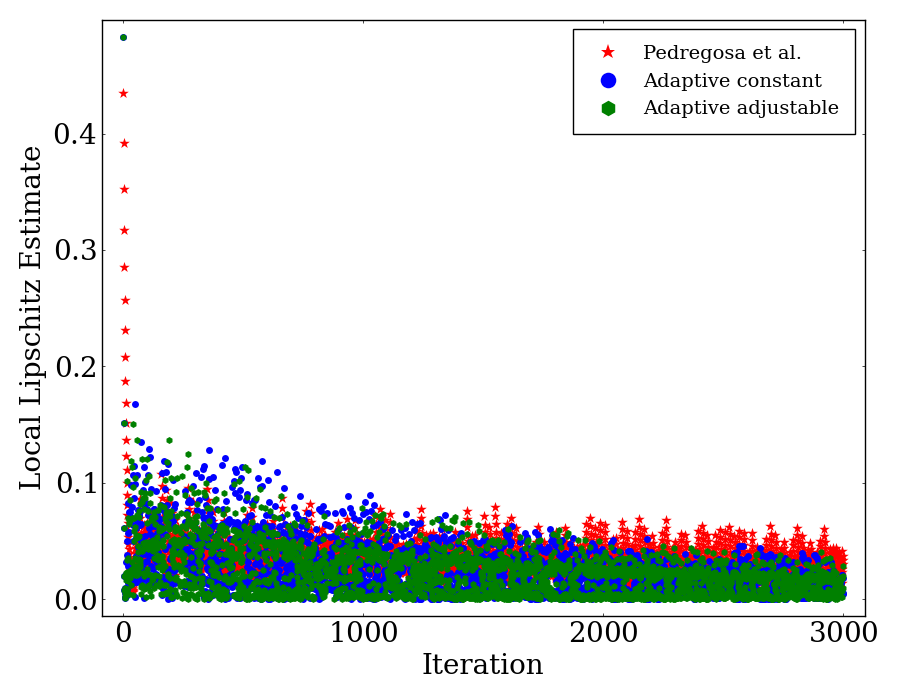

Saved plot: /content/output/LSSRa1a_Gap.eps


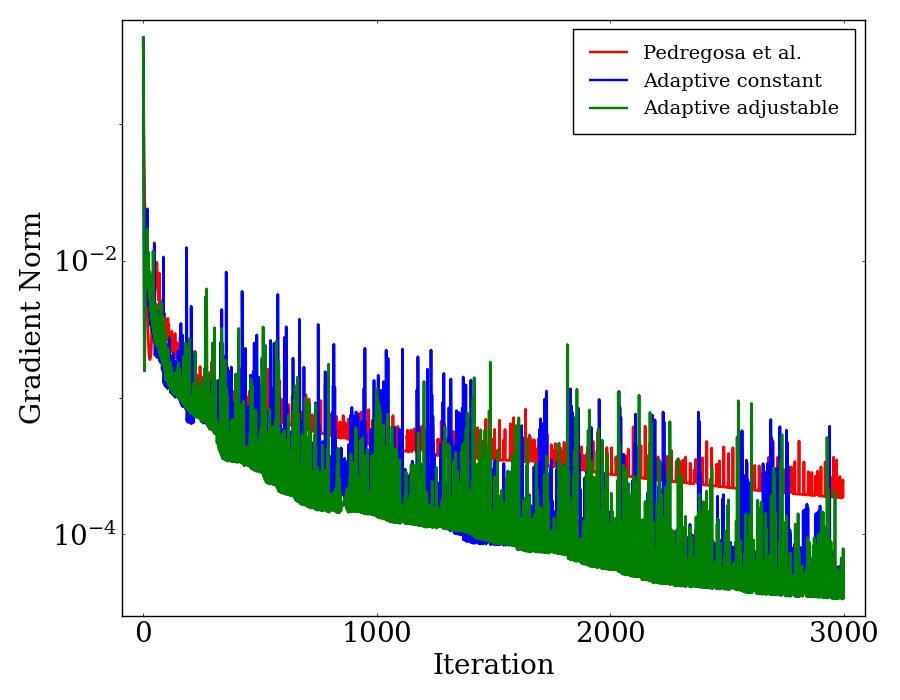

Saved plot: /content/output/LSSRa1a_Gap_vs_time.eps


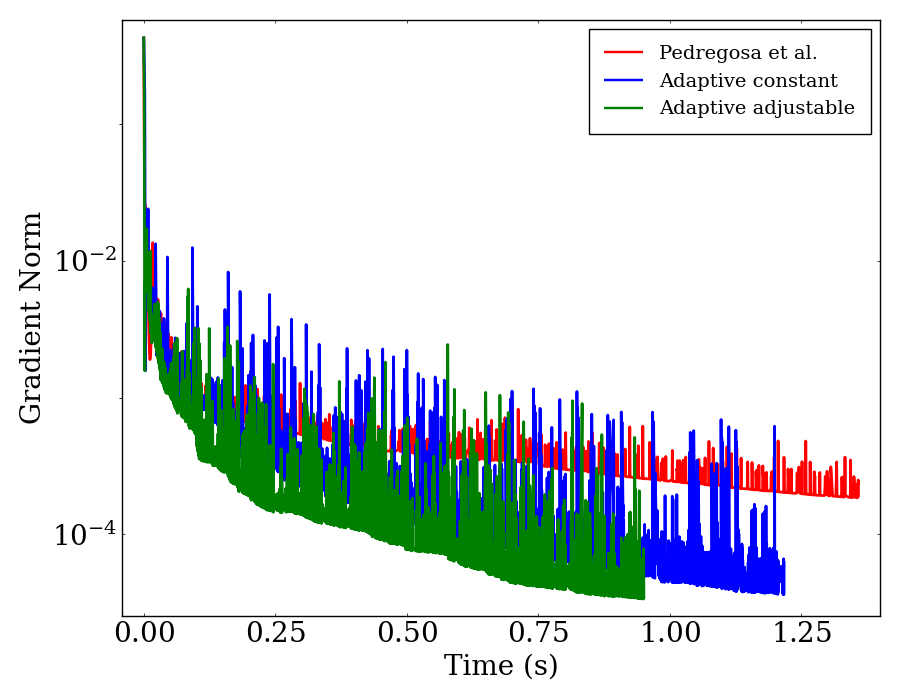

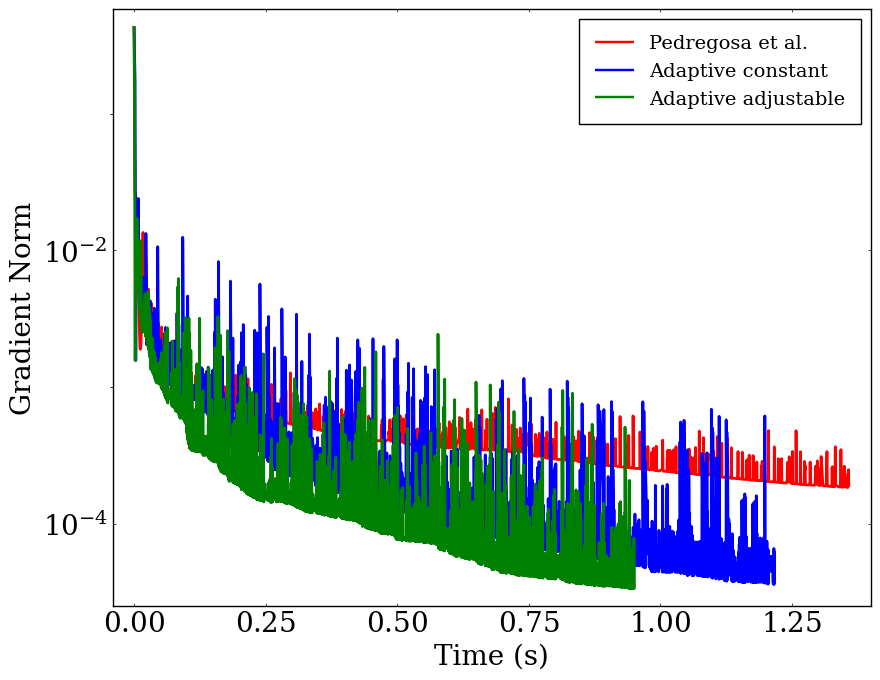

In [8]:
# Ensure all necessary packages are loaded
using DataFrames
using LinearAlgebra
using Statistics
using MAT
using Random
using Plots
using Zygote
using Measures
using PyPlot
using CSV
using Arpack
using Downloads
using SparseArrays



our = matread(joinpath(output_dir, "results_FW_OUR.mat"))
our5 = matread(joinpath(output_dir, "results_FW_OUR_5.mat"))
ped = matread(joinpath(output_dir, "results_FW_Pedregosa.mat"))

#______________________________________________________________________________#
# Define the output file for the table
println("\n# Summary of Results:")
println("Method             | Iterations | Time     | Objective | Dual Gap   | Backtracking | Max L_k   | Mean L_k")
println("-------------------|------------|----------|-----------|------------|--------------|-----------|----------|")
println("Adaptive constant  | $(length(our["values"]) - 1) | $(round(sum(our["times"]), digits=4)) | $(round(our["values"][end], digits=6)) | $(round(our["gaps"][end], digits=4)) | $(sum(our["backtrack_counts"])) | $(round(maximum(our["L_ks"]), digits=6)) | $(round(mean(our["L_ks"]), digits=6))")
println("Adaptive adjustable| $(length(our5["values"]) - 1) | $(round(sum(our5["times"]), digits=4)) | $(round(our5["values"][end], digits=6)) | $(round(our5["gaps"][end], digits=4)) |  $(sum(our5["backtrack_counts"])) | $(round(maximum(our5["L_ks"]), digits=6)) | $(round(mean(our5["L_ks"]), digits=6))")
println("Pedregosa et al.   | $(length(ped["values"]) - 1) | $(round(sum(ped["times"]), digits=4)) | $(round(ped["values"][end], digits=6)) | $(round(ped["gaps"][end], digits=4)) | $(sum(ped["backtrack_counts"])) | $(round(maximum(ped["L_ks"]), digits=6)) | $(round(mean(ped["L_ks"]), digits=6))")
println("\nAll computations and plotting complete. Check $output_dir for results.")
#______________________________________________________________________________#
# Print confirmation to console
println("All computations and plotting complete. Check $output_dir for results.")


#________________________new________Ploting_______________________________________#
function create_and_save_plots()
    # Load data
    our = matread(joinpath(output_dir, "results_FW_OUR.mat"))
    our5 = matread(joinpath(output_dir, "results_FW_OUR_5.mat"))
    ped = matread(joinpath(output_dir, "results_FW_Pedregosa.mat"))


    # Compute cumulative times
    our_cum_times = [0.0; cumsum(our["times"][2:end])]
    our5_cum_times = [0.0; cumsum(our5["times"][2:end])]
    ped_cum_times = [0.0; cumsum(ped["times"][2:end])]


    # Define style dictionary based on the template
    style = Dict(:titlefont => (20, "DejaVu Serif"),
                 :guidefont => (20, "DejaVu Serif"),
                 :tickfont => (20, "DejaVu Serif"),
                 :legendfont => (14, "DejaVu Serif"),
                 :grid => false,
                 :framestyle => :box,
                 :margin => 5mm,
                 #:size => (600, 400),
                 :size => (900, 700),
                 :linewidth => 2)

    # Lipschitz Constants (p1) - Unchanged
    p1 = Plots.plot(ped["L_ks"],
                    label="Pedregosa et al.",
                    color=:red,
                    seriestype=:scatter,
                    markersize=8,
                    marker=:star5,
                    markerstrokewidth=0,
                    xlabel="Iteration",
                    ylabel="Local Lipschitz Estimate",
                    titlefont=style[:titlefont],
                    guidefont=style[:guidefont],
                    tickfont=style[:tickfont],
                    legendfont=style[:legendfont],
                    grid=style[:grid],
                    framestyle=style[:framestyle],
                    margin=style[:margin],
                    size=style[:size],
                    linewidth=style[:linewidth],
                    legend=:topright,
                    legendtitle="",
                    legendforegroundcolor=:black,
                    legendbackgroundcolor=:white)

    Plots.plot!(p1, our["L_ks"],
                    label="Adaptive constant",
                    color=:blue,
                    seriestype=:scatter,
                    markersize=5,
                    marker=:circle,
                    markerstrokewidth=0)

    Plots.plot!(p1, our5["L_ks"],
                    label="Adaptive adjustable",
                    color=:green,
                    seriestype=:scatter,
                    markersize=5,
                    marker=:hexagon,
                    markerstrokewidth=0)

    Plots.savefig(p1, joinpath(output_dir, "LSSRa1a_L.eps"))
    println("Saved plot: ", joinpath(output_dir, "LSSRa1a_L.eps"))
    display(p1)

    # Dual Gap vs Iteration (p2)
    p2 = Plots.plot(ped["gaps"],
                    label="Pedregosa et al.",
                    color=:red,
                  #  linestyle=:dot,
                    markerstrokecolor=:red,
                    markersize=5,
                    yscale=:log10,
                    xlabel="Iteration",
                    ylabel="Gradient Norm",
                    titlefont=style[:titlefont],
                    guidefont=style[:guidefont],
                    tickfont=style[:tickfont],
                    legendfont=style[:legendfont],
                    grid=style[:grid],
                    framestyle=style[:framestyle],
                    margin=style[:margin],
                    size=style[:size],
                    linewidth=style[:linewidth],
                    legend=:topright,
                    legendtitle="",
                    legendforegroundcolor=:black,
                    legendbackgroundcolor=:white)

    Plots.plot!(p2, our["gaps"],
                    label="Adaptive constant",
                    color=:blue,
                  #  linestyle=:solid,
                    markerstrokecolor=:blue,
                    markersize=5,
                    linewidth=style[:linewidth])

    Plots.plot!(p2, our5["gaps"],
                    label="Adaptive adjustable",
                    color=:green,
                  #  linestyle=:dash,
                    markerstrokecolor=:green,
                    markersize=5,
                    linewidth=style[:linewidth])

    Plots.savefig(p2, joinpath(output_dir, "LSSRa1a_Gap.eps"))
    println("Saved plot: ", joinpath(output_dir, "LSSRa1a_Gap.eps"))
    display(p2)


    # Dual Gap vs Time plot (p6)
    p6 = Plots.plot(ped_cum_times[1:end-1],
                    ped["gaps"][1:end],
                    label="Pedregosa et al.",
                    color=:red,
                   # linestyle=:dot,
                    markerstrokecolor=:red,
                    yscale=:log10,
                    xlabel="Time (s)",
                    ylabel="Gradient Norm",
                    markersize=5,
                    titlefont=style[:titlefont],
                    guidefont=style[:guidefont],
                    tickfont=style[:tickfont],
                    legendfont=style[:legendfont],
                    grid=style[:grid],
                    framestyle=style[:framestyle],
                    margin=style[:margin],
                    size=style[:size],
                    linewidth=style[:linewidth],
                    legend=:topright,
                    legendtitle="",
                    legendforegroundcolor=:black,
                    legendbackgroundcolor=:white)


    Plots.plot!(p6, our_cum_times[1:end-1],
                    our["gaps"][1:end],
                    label="Adaptive constant",
                    color=:blue,
                  #  linestyle=:solid,
                    markerstrokecolor=:blue,
                    markersize=5,
                    linewidth=style[:linewidth])

    Plots.plot!(p6, our5_cum_times[1:end-1],
                    our5["gaps"][1:end],
                    label="Adaptive adjustable",
                    color=:green,
                   # linestyle=:dash,
                    markerstrokecolor=:green,
                    markersize=5,
                    linewidth=style[:linewidth])


    Plots.savefig(p6, joinpath(output_dir, "LSSRa1a_Gap_vs_time.eps"))
    println("Saved plot: ", joinpath(output_dir, "LSSRa1a_Gap_vs_time.eps"))
    display(p6)
end

create_and_save_plots()
#______________________________________________________________________________#

In [12]:
# Step 1: Zip the correct output folder
try
    run(`zip -r /content/output.zip /content/output`)
    println("Zipping successful!")
catch e
    println("Error during zipping: ", e)
end

# Step 2: Prepare to download the file
using PyCall

# Import the Python module *before* the try...catch block
@pyimport google.colab.files as colab_files

# Step 3: Trigger the download
try
    println("Preparing to download...")
    println("Please check your browser to confirm the download.")
    # Download the correctly named zip file
    colab_files.download("/content/output.zip")
catch e
    println("Error during download: ", e)
    println("Please ensure you are running this in a Google Colab environment.")
end

  adding: content/output/ (stored 0%)
  adding: content/output/results_FW_OUR_5.mat (deflated 36%)
  adding: content/output/LSSRa1a_Gap.eps (deflated 57%)
  adding: content/output/results_FW_OUR.mat (deflated 36%)
  adding: content/output/LSSRa1a_Gap_vs_time.eps (deflated 58%)
  adding: content/output/LSSRa1a_L.eps (deflated 61%)
  adding: content/output/results_FW_Pedregosa.mat (deflated 37%)
Zipping successful!
Preparing to download...
Please check your browser to confirm the download.
Error during download: PyError ($(Expr(:escape, :(ccall(#= /root/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'kernel'")
  File "/usr/local/lib/python3.11/dist-packages/google/colab/files.py", line 235, in download
    comm_manager = _IPython.get_ipython().kernel.comm_manager
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Please ensure you are 